## Introduction 

The variable and uncontrollably changing wind conditions pose a common challenge to all grid operators seeking to effectively integrate in order to meet the present demand. The grid operator now has to forecast not just supply and demand, but also whether wind and solar power plants will be available in the upcoming hour, day, or week. Inaccurate scheduling of wind power plants can prevent the benefits of renewable energy from being realized and also result in increased prices being passed on to the customer, needless reservations, and the use of more costly and environmentally harmful electricity sources. Working with real data presents difficulties because of missing periods and noise.

In [1]:
import pandas as pd

In [2]:
#importing the dataset
data = pd.read_csv("TexasTurbine.csv")
data.shape

(8760, 6)

The National Renewable Energy Laboratory (NREL) software is used to replicate the given full-year hourly time-series for a site in Texas, US. It has flawless data completeness and no noisy data—problems that impede and divert attention from forecasting jobs using actual datasets. Numerous meteorological variables in the dataset can be examined and applied as predictors.

## Data Cleaning and Wrangling

In [3]:
# showing the first five rows in the dataset
data.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [4]:
# showing column types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time stamp                     8760 non-null   object 
 1   System power generated | (kW)  8760 non-null   float64
 2   Wind speed | (m/s)             8760 non-null   float64
 3   Wind direction | (deg)         8760 non-null   int64  
 4   Pressure | (atm)               8760 non-null   float64
 5   Air temperature | ('C)         8760 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [5]:
# showing statistical information on each column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
System power generated | (kW),8760.0,964.467934,878.558112,0.000000,215.951500,693.968500,1562.287500,3004.01000
Wind speed | (m/s),8760.0,7.376120,3.138291,0.119000,5.121000,7.340500,9.599000,19.74300
Wind direction | (deg),8760.0,146.616210,84.678754,0.000000,99.000000,135.000000,169.000000,360.00000
Pressure | (atm),8760.0,0.992368,0.005332,0.974514,0.988925,0.991495,0.995045,1.01451
Air temperature | ('C),8760.0,22.147298,4.855232,3.263000,19.463000,22.763000,26.063000,32.96300


In [6]:
# checking for null values
data.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

** no null values in the dataset. 

In [7]:
# checking for duplicates
data[data.duplicated()].shape

(0, 6)

** no duplicates either

# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'System power generated | (kW)'}>,
        <AxesSubplot:title={'center':'Wind speed | (m/s)'}>],
       [<AxesSubplot:title={'center':'Wind direction | (deg)'}>,
        <AxesSubplot:title={'center':'Pressure | (atm)'}>],
       [<AxesSubplot:title={'center':"Air temperature | ('C)"}>,
        <AxesSubplot:>]], dtype=object)

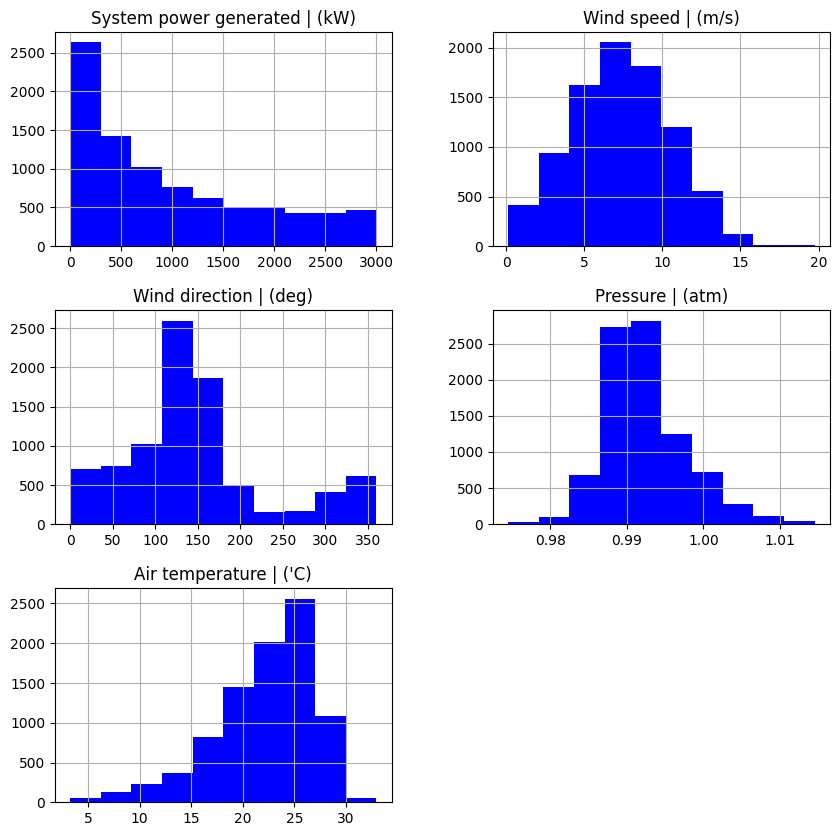

In [8]:
#showing the histogram of each column in the dataset
data.hist(figsize = (10,10), color = 'b')

** The highest frequency of power generation appears to be around 500-1000 kW, with a secondary peak at about 2500 kW. There's a gradual decrease in frequency for power outputs between these two peaks.


** The wind speed distribution shows that speeds around 5-10 m/s are most common, with a peak at about 7-8 m/s. Very low and very high wind speeds are less frequent.


** The wind direction appears to be most frequently from around 150 degrees (southeast), with another common direction around 300 degrees (northwest).


** Pressure readings are tightly clustered around 1 atmosphere, with slight variations between 0.99 and 1.01 atm.


** Temperatures are most frequently in the 20-30°C range, with a peak around 25-30°C.


In [9]:
import datetime as dt

In [10]:
# converting Timestamp column from object to datetime

data['Time stamp'] = pd.to_datetime(data['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%b %d %H:%M:%S.%f')
data['Time stamp'] = data['Time stamp'].apply(lambda x: dt.datetime.strptime(x,'%b %d %H:%M:%S.%f') if type(x)==str else pd.NaT)

In [11]:
# add month column
data["Month"]= data["Time stamp"].dt.month

In [12]:
display(data.tail())

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
8755,1900-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,12
8756,1900-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,12
8757,1900-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,12
8758,1900-12-31 22:00:00,1221.36,8.799,116,0.998013,18.063,12
8759,1900-12-31 23:00:00,1676.77,9.748,121,1.000380,18.163,12


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

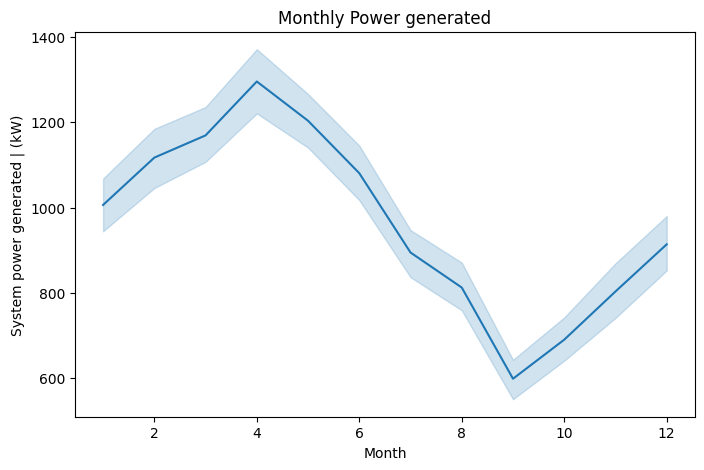

In [14]:
# showing the  power generated over the months
plt.figure(figsize=(8,5))
sns.lineplot(data=data,x="Month",y="System power generated | (kW)",)
plt.title("Monthly Power generated")
plt.style.use("bmh")
plt.show()


There's a clear seasonal trend in power generation.

** The highest power output occurs around month 4-5 (April-May), reaching about 1300 kW.

** The system generates the least power around month 9 (September), dropping to about 600 kW.

** After the lowest point in September, there's a steady increase in power generation towards the end of the year.

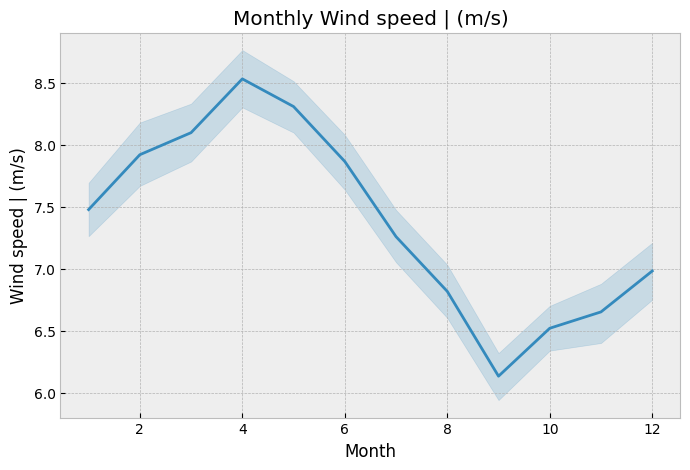

In [15]:
# showing the wind speed recorded over the months
plt.figure(figsize=(8,5))
sns.lineplot(data=data,x="Month",y="Wind speed | (m/s)",)
plt.title("Monthly Wind speed | (m/s)")
plt.style.use("bmh")
plt.show()


This chart closely mirrors the pattern seen in the Monthly System Power Generated chart suggesting that the power output directly correlates with wind speed patterns throughout the year.

** The highest wind speeds occur around month 4 (April), reaching about 8.5 m/s.

** Lowest wind speed: The lowest wind speeds are observed around month 9 (September), dropping to about 6.2 m/s.

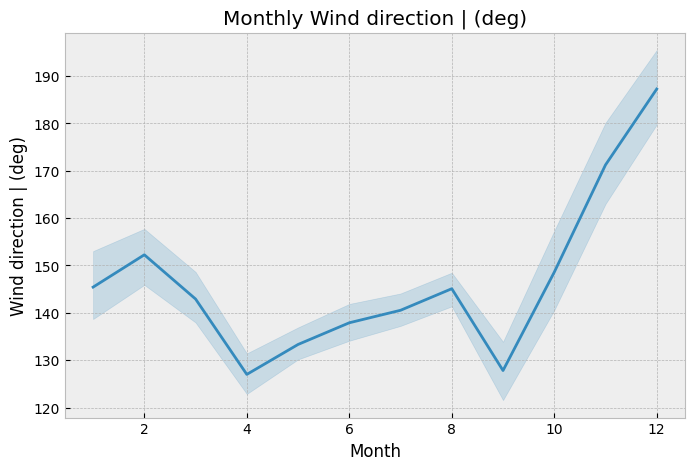

In [16]:
# showing the wind direction recorded over the months
plt.figure(figsize=(8,5))
sns.lineplot(data=data,x="Month",y="Wind direction | (deg)",)
plt.title("Monthly Wind direction | (deg)")
plt.style.use("bmh")
plt.show()


The changes in wind direction throughout the year could have implications for the positioning and efficiency of wind turbines. The significant shift towards the end of the year might require adjustments in turbine orientation to maximize energy capture.

** The wind direction changes significantly over the course of the year, ranging from about 130° to 190°.

** The wind directions mostly fall between 130° and 190°, indicating predominantly southeasterly winds throughout the year.

** There's a notable shift in wind direction towards the end of the year (months 10-12), moving from around 130° to 190°. This suggests a change from more easterly winds to more southerly winds.

** The most easterly winds (lowest degree values) occur around month 4 (April), at about 130°.

** There seems to be a cyclical pattern, with wind directions starting around 145° in January, decreasing to about 130° in April, then gradually increasing back to higher values by the end of the year.

** This wind direction pattern could be influenced by seasonal changes in atmospheric circulation patterns, such as the movement of high and low-pressure systems or larger scale phenomena like monsoons or trade winds.

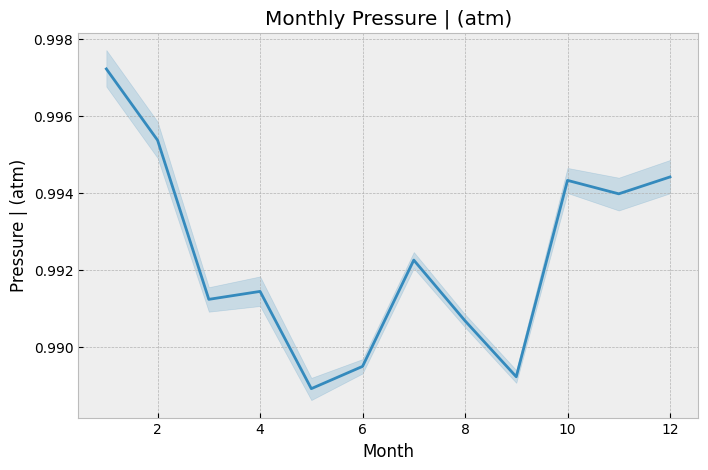

In [17]:
# showing the Pressure recorded over the months
plt.figure(figsize=(8,5))
sns.lineplot(data=data,x="Month",y="Pressure | (atm)",)
plt.title("Monthly Pressure | (atm)")
plt.style.use("bmh")
plt.show()


Higher pressure in winter months often correlates with colder, denser air, while lower pressure in summer months can be associated with warmer air and more unstable weather conditions.

It's important to note that while these variations are consistent and show a clear pattern, they are quite small in absolute terms. Such small variations in pressure are unlikely to have a significant direct impact on wind turbine performance, but they may be indicative of broader weather patterns that do affect wind speeds and directions.

** The pressure variations throughout the year are very small, with all values falling between approximately 0.989 and 0.998 atm. This is a variation of less than 1% from the standard atmospheric pressure of 1 atm.

** Despite the small range, there is a discernible seasonal pattern in atmospheric pressure.

** The highest pressure occurs in the winter months, with a peak in January (month 1) at about 0.997 atm.

** The lowest pressure is observed in the late spring/early summer, with the minimum around month 5-6 (May-June) at about 0.989 atm.

** There's a noticeable increase in pressure from around month 9 (September) through the end of the year.

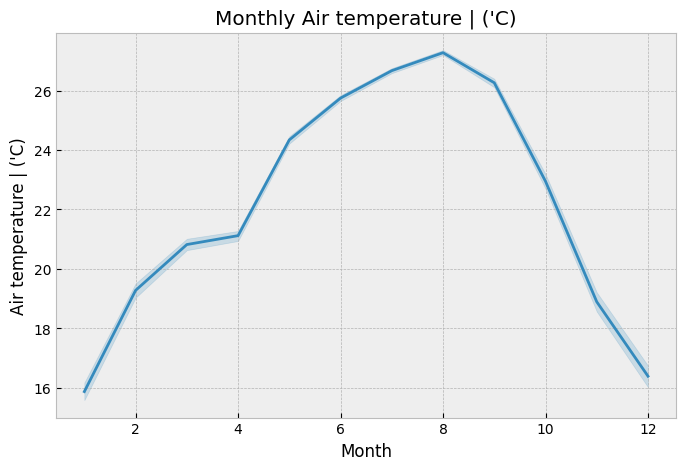

In [18]:
# showing the Air temperature recorded over the months
plt.figure(figsize=(8,5))
sns.lineplot(data=data,x="Month",y="Air temperature | ('C)",)
plt.title("Monthly Air temperature | ('C)")
plt.style.use("bmh")
plt.show()

In the context of wind power generation, temperature can indirectly affect system performance. While not as directly impactful as wind speed or direction, temperature influences air density, which in turn affects the energy content of moving air. Warmer air is less dense, which can slightly reduce wind turbine efficiency, while cooler air is denser and can marginally improve efficiency.

The temperature pattern here also correlates with the pressure chart, with lower pressures generally coinciding with higher temperatures in the summer months, which is a common atmospheric relationship.

** The highest temperatures occur during the summer months, peaking around month 8 (August) at approximately 27°C.

** The lowest temperatures are observed in the winter, with the minimum in month 1 (January) at about 16°C.

** The annual temperature range is roughly 11°C, from about 16°C to 27°C.

In [19]:
# Defining seasons in Texas by month
data.loc[data["Month"].isin([12, 1, 2]), "season"] = "Winter"
data.loc[data["Month"].isin([3, 4, 5]), "season"] = "Spring"
data.loc[data["Month"].isin([6, 7, 8]), "season"] = "Summer"
data.loc[data["Month"].isin([9, 10, 11]), "season"] = "Fall"

In [20]:
def show_boxplot(
    df: pd.DataFrame,
    x_axis: str,
    y_axis: str,
    boxes_order=None
):
    plt.figure(figsize=(10, 6))

    sns.boxplot(
        data=df,
        x=x_axis,
        y=y_axis,
        order=boxes_order
    )

    plt.show()

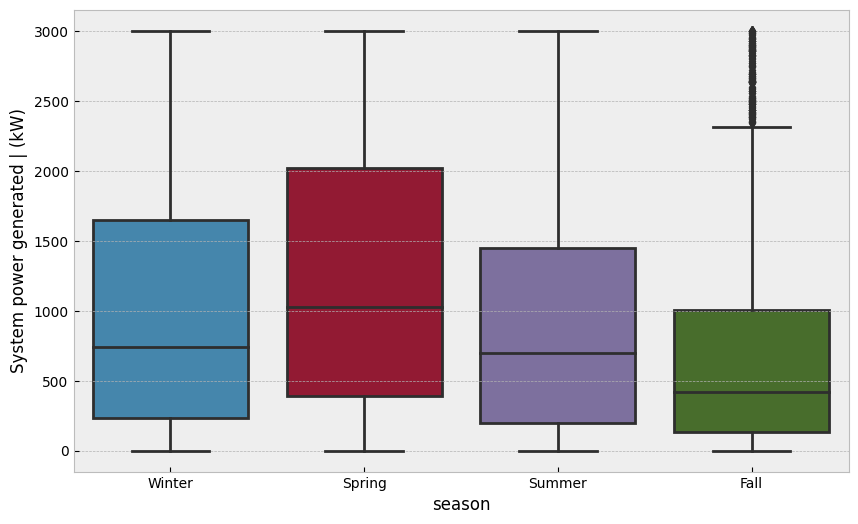

In [21]:
# boxplot showing power generated by season
show_boxplot(
    df=data,
    x_axis="season",
    y_axis="System power generated | (kW)",
    boxes_order=["Winter", "Spring", "Summer", "Fall"]
)

** Spring has the highest median power generation and the largest interquartile range, suggesting more variable but generally higher output.

** Winter and Summer have similar median outputs, but Winter shows more variability.

** Fall has the lowest median output but also shows some extreme high values (outliers).

In [22]:
# add month column
data["hour"]= data["Time stamp"].dt.hour

In [23]:
display(data.head())

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month,season,hour
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,Winter,0
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,Winter,1
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,Winter,2
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,Winter,3
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,Winter,4


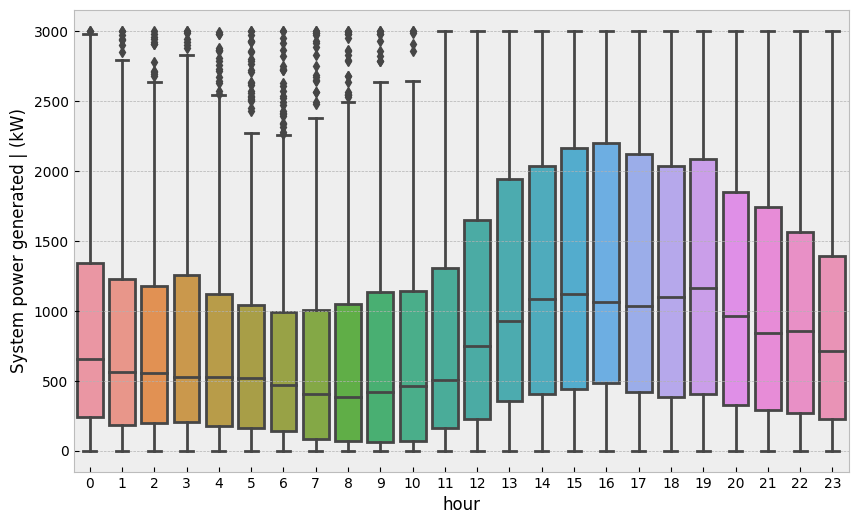

In [24]:
# boxplot showing power generated by hour
show_boxplot(
    df=data,
    x_axis="hour",
    y_axis="System power generated | (kW)"
)

** There's a clear daily pattern, with power generation generally increasing from early morning to mid-afternoon, then decreasing into the evening.

** The highest median outputs and greatest variability occur during daylight hours, particularly from around 11 AM to 7 PM.

** Nighttime hours (roughly 10 PM to 6 AM) show lower and more consistent power generation.

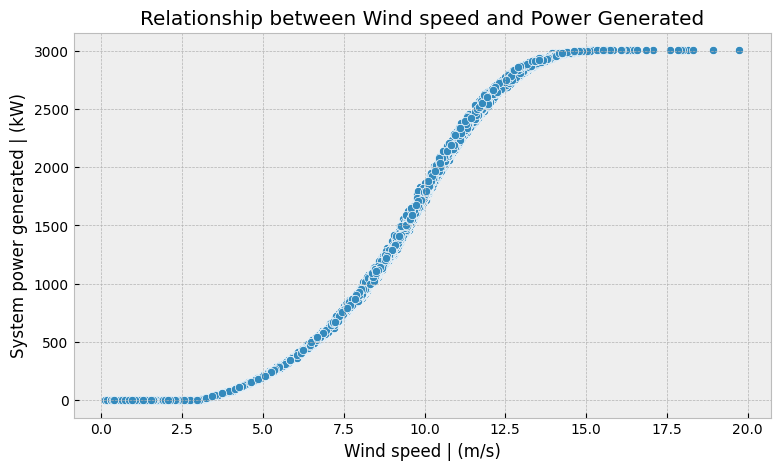

In [25]:
# # scatterplot showing the relationship between Wind speed and Power Generated overtime
plt.figure(figsize=(9,5))
sns.scatterplot(data=data,x="Wind speed | (m/s)",y="System power generated | (kW)",)
plt.title("Relationship between Wind speed and Power Generated")
plt.show()

There's a clear non-linear relationship between wind speed and power generated.

** Little to no power is generated at very low wind speeds (below about 3 m/s).

** Power output increases rapidly as wind speed increases from about 5 m/s to 12 m/s.

** The power output plateaus around 3000 kW at wind speeds above approximately 13-14 m/s, indicating the system's maximum capacity.

In [26]:
import numpy as np

In [27]:
# Defining the buckets of the wind direction angle
data.loc[data["Wind direction | (deg)"].isin(np.arange(0, 91, 1)), "angle_bucket"] = "0-90"
data.loc[data["Wind direction | (deg)"].isin(np.arange(91, 181, 1)), "angle_bucket"] = "91-180"
data.loc[data["Wind direction | (deg)"].isin(np.arange(181, 271, 1)), "angle_bucket"] = "181-270"
data.loc[data["Wind direction | (deg)"].isin(np.arange(271, 361, 1)), "angle_bucket"] = "271-360"

The angle buckets represent wind direction in degrees (0-360°).

In [28]:
display(data.head())

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month,season,hour,angle_bucket
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,Winter,0,91-180
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,Winter,1,91-180
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,Winter,2,91-180
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,Winter,3,91-180
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,Winter,4,91-180


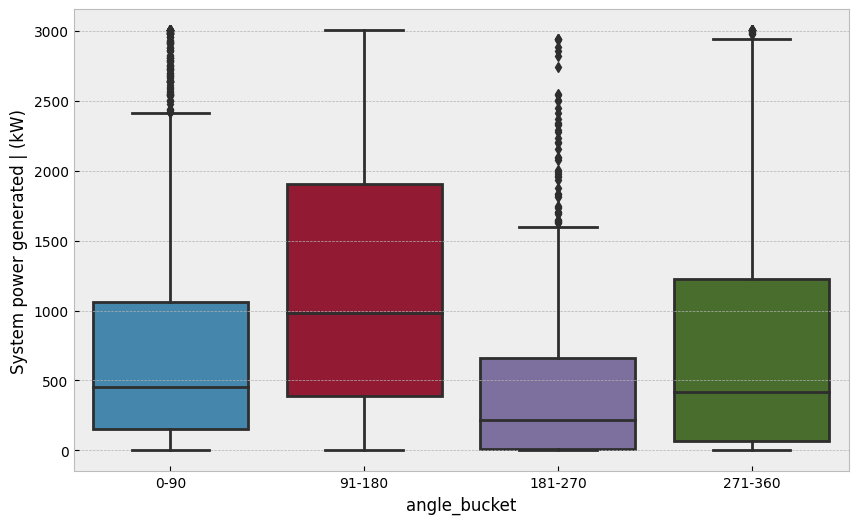

In [29]:
# boxplot showing power generated in relation to wind direction
show_boxplot(
    df=data,
    x_axis="angle_bucket",
    y_axis="System power generated | (kW)",
    boxes_order=["0-90", "91-180", "181-270", "271-360"]
)

** Power generation is highest for winds coming from 91-180° (east to south) and 271-360° (west to north).

** The 91-180° bucket shows the highest median power output and largest variability.

** The 181-270° bucket (south to west) shows the lowest median power output.

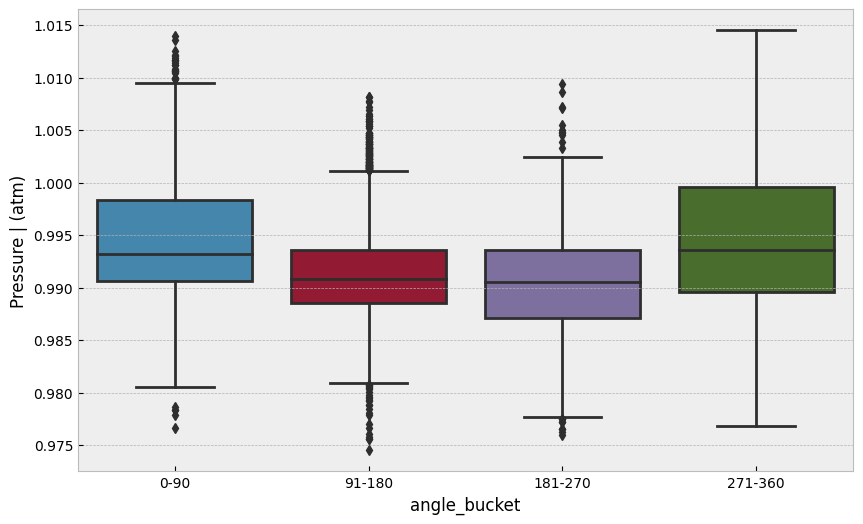

In [30]:
# boxplot showing pressure recorded in relation to wind direction
show_boxplot(
    df=data,
    x_axis="angle_bucket",
    y_axis="Pressure | (atm)",
    boxes_order=["0-90", "91-180", "181-270", "271-360"]
)

** Air pressure variations are relatively small across all wind directions (ranging from about 0.975 to 1.015 atm).

** The 0-90° bucket (north to east) shows slightly higher median pressure.

** The 271-360° bucket (west to north) shows the largest variability in pressure.

Overall, pressure differences across wind directions are minimal, suggesting local atmospheric conditions don't vary drastically with wind direction.

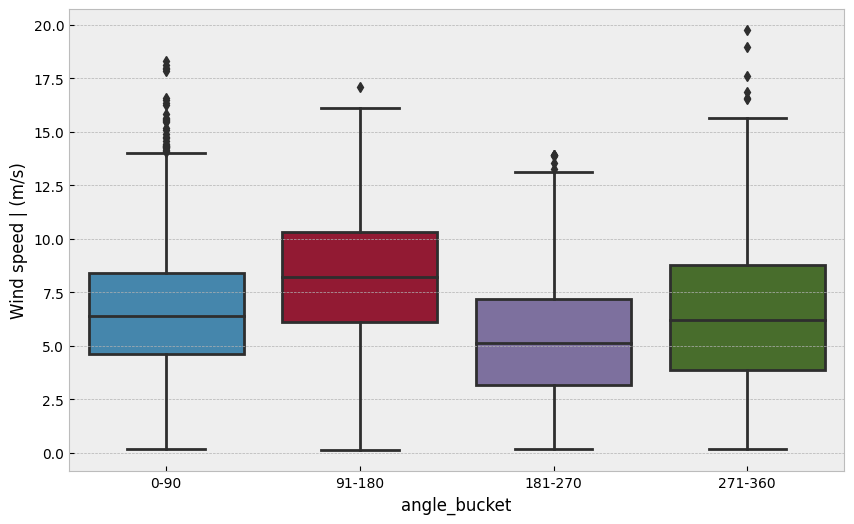

In [31]:
# boxplot showing wind speed recorded in relation to wind direction
show_boxplot(
    df=data,
    x_axis="angle_bucket",
    y_axis="Wind speed | (m/s)",
    boxes_order=["0-90", "91-180", "181-270", "271-360"]
)

** Wind speeds are generally highest from the 91-180° direction (east to south), with the highest median and upper quartile.

** The 181-270° direction (south to west) shows the lowest median wind speeds.

** All directions show some very high wind speed outliers, with the 271-360° bucket having the highest outliers.

In [32]:
display(data.head())

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month,season,hour,angle_bucket
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,Winter,0,91-180
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,Winter,1,91-180
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,Winter,2,91-180
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,Winter,3,91-180
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,Winter,4,91-180


## Feature Engineering

In [33]:
#dropping columns irelevant to our model
df = data.drop(columns=["Time stamp", "season", "angle_bucket"])

<AxesSubplot:>

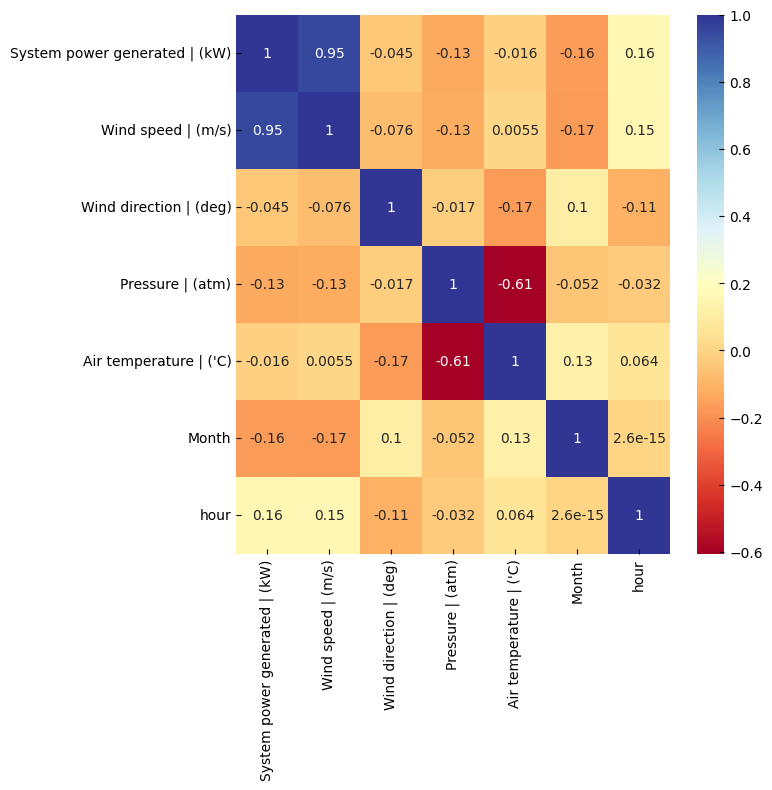

In [34]:
# showing correlations between columns
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlBu')

In [35]:
from sklearn.model_selection import train_test_split,cross_val_score

In [36]:
# splitting dataset into target and feature parts
target = df['System power generated | (kW)']
features = df.drop("System power generated | (kW)", axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.33, 
                                                    random_state=10)


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
#scalinng test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, features, target, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [40]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## Modelling

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [42]:
from sklearn.metrics import *

In [43]:
#Warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 217.01186934060289
MSE: 68641.2017740204
RMSE: 261.994659819662
R2 Score: 0.9066709840163071
------------------------------
RMSE Cross-Validation: 263.09838574279985


In [45]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 3.180362955894153
MSE: 34.025212126452
RMSE: 5.833113416217106
R2 Score: 0.9999537371216656
------------------------------
RMSE Cross-Validation: 6.93206439409246
